# Homework 2 - Part 2
This part, I work with the tonnage data collected by DSNY. 
Instructions are from: https://github.com/fedhere/PUI2018_fb55/blob/master/HW3_fb55/Assignment2_example.ipynb

1. Work in the ADRF. Fire off a Jupyter notebook with Jupyter Hub or Jupyter Lab for Mac and Linux and switch to the Kernel PUI2016_Python2 or PUI2016_Python3 from the Jupyter dropdown menu under Kernels -> Change Kernel.
The below cell shows all the packages I imported and need to use. 

In [2]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

## Data Downloading and PUIdata folder testing

In [3]:
puidata = os.getenv("PUIDATA")
if puidata is None:
    os.environ["PUIDATA"] = "%s/PUIdata"%os.getenv("HOME")

In [4]:
!curl https://data.cityofnewyork.us/api/views/ebb7-mvp5/rows.csv?accessType=DOWNLOAD > tonnage.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 41414    0 41414    0     0   229k      0 --:--:-- --:--:-- --:--:--  231k


Check that an environmental variable PUIDATA exists and that it points to the PUIdata directory. Forcefully set it up within the notebook if it is not.Follow the instructions in this notebok. The CSV file must have at least 2 numerical value columns.

In [5]:
puidata=os.getenv("PUIDATA")
puidata

'/nfshome/sz2404/PUIdata'

In [6]:
print ("puidata:", os.getenv("PUIDATA"))

puidata: /nfshome/sz2404/PUIdata


In [7]:
#Making the environmental variable
os.environ["PUIDATA"] = "%s/PUIdata"%os.getenv("HOME")

print("PUIdata", os.getenv("PUIDATA"))

PUIdata /nfshome/sz2404/PUIdata


In [8]:
!mv tonnage.csv $PUIDATA

In [9]:
!ls $PUIDATA

DCAS_Managed_Building_Fuel_Usage.csv  gittest_lavz  Treasure^C
DSNY_Monthly_Tonnage_Data.csv	      tonnage.csv


## DSNY Tonnage Data
In this step, importing data from NYC Open Data and read it. 
Here is the link to Tonnage Data: https://data.cityofnewyork.us/City-Government/DSNY-Monthly-Tonnage-Data/ebb7-mvp5/data

In [10]:
#dobdata=pd.read_csv(puidata + '/DCAS_Managed_Building_Fuel_Usage.csv')
#dobdata
#tonurl="https://data.cityofnewyork.us/api/views/ebb7-mvp5/rows.csv?accessType=DOWNLOAD"
Tonnage=pd.read_csv("%s/tonnage.csv"%os.getenv("PUIDATA"))

#### Display the Top 7 rows in this table
3.Display the top 7 rows of the DF in your notebook. This table must be rendered.

In [11]:
Tonnage.head(7)

,MONTH,BOROUGH,COMMUNITYDISTRICT,REFUSETONSCOLLECTED,PAPERTONSCOLLECTED,MGPTONSCOLLECTED,RESORGANICSTONS,SCHOOLORGANICTONS,LEAVESORGANICTONS,XMASTREETONS,BOROUGH_ID
0,2017 / 08,Manhattan,7,4754.7,997.3,720.0,19.4,NaN,NaN,NaN,1
1,2017 / 08,Manhattan,12,4996.5,494.5,530.3,NaN,NaN,NaN,NaN,1
2,2017 / 08,Queens,8,3805.1,461.0,412.8,NaN,NaN,NaN,NaN,4
3,2017 / 08,Brooklyn,18,5907.8,584.1,599.3,NaN,NaN,NaN,NaN,3
4,2017 / 08,Queens,5,4827.9,597.6,758.9,185.3,NaN,NaN,NaN,4
5,2017 / 08,Bronx,9,4003.6,215.7,335.8,NaN,NaN,NaN,NaN,2
6,2017 / 08,Brooklyn,2,2448.5,544.3,360.0,53.5,NaN,NaN,NaN,3


4.Remove all but 2 numerical values columns of your choice (you can use the drop method of the dataframe, like in the lab example.)

In [12]:
Tonnage.columns

Index(['MONTH', 'BOROUGH', 'COMMUNITYDISTRICT', 'REFUSETONSCOLLECTED',
       'PAPERTONSCOLLECTED', 'MGPTONSCOLLECTED', 'RESORGANICSTONS',
       'SCHOOLORGANICTONS', 'LEAVESORGANICTONS', 'XMASTREETONS', 'BOROUGH_ID'],
      dtype='object')

I use the drop function to eliminate other columns and only leave two here for further plotting. I chose to keep tree_dbh(diametre of the tree measured at breast height) and borocode (the numerical code representing one of the five boroughs where the tree is standing). 

In [13]:
TonnageR=Tonnage.drop(['MONTH', 'BOROUGH', 'COMMUNITYDISTRICT', 'MGPTONSCOLLECTED', 'RESORGANICSTONS',
       'SCHOOLORGANICTONS', 'LEAVESORGANICTONS', 'XMASTREETONS', 'BOROUGH_ID'], axis=1)

5.Display the reducted dataframe. This table must be rendered.

In [14]:
TonnageR.head(10)

,REFUSETONSCOLLECTED,PAPERTONSCOLLECTED
0,4754.7,997.3
1,4996.5,494.5
2,3805.1,461.0
3,5907.8,584.1
4,4827.9,597.6
5,4003.6,215.7
6,2448.5,544.3
7,5168.9,365.9
8,3165.5,521.0
9,2118.4,115.2


6.Plot the columns one against the other in a scatter plot using the datafraome plot method, like in the lab example. (usual rules for plotting apply, see Grading Guidelines and the instruction notebooks for HW1 Extra Credit, part 3, for more detailed hints on how to display your rendered plots, and the Lab3 and Class notebooks examples on how to use the dataframe plot modules. The plot must be rendered.

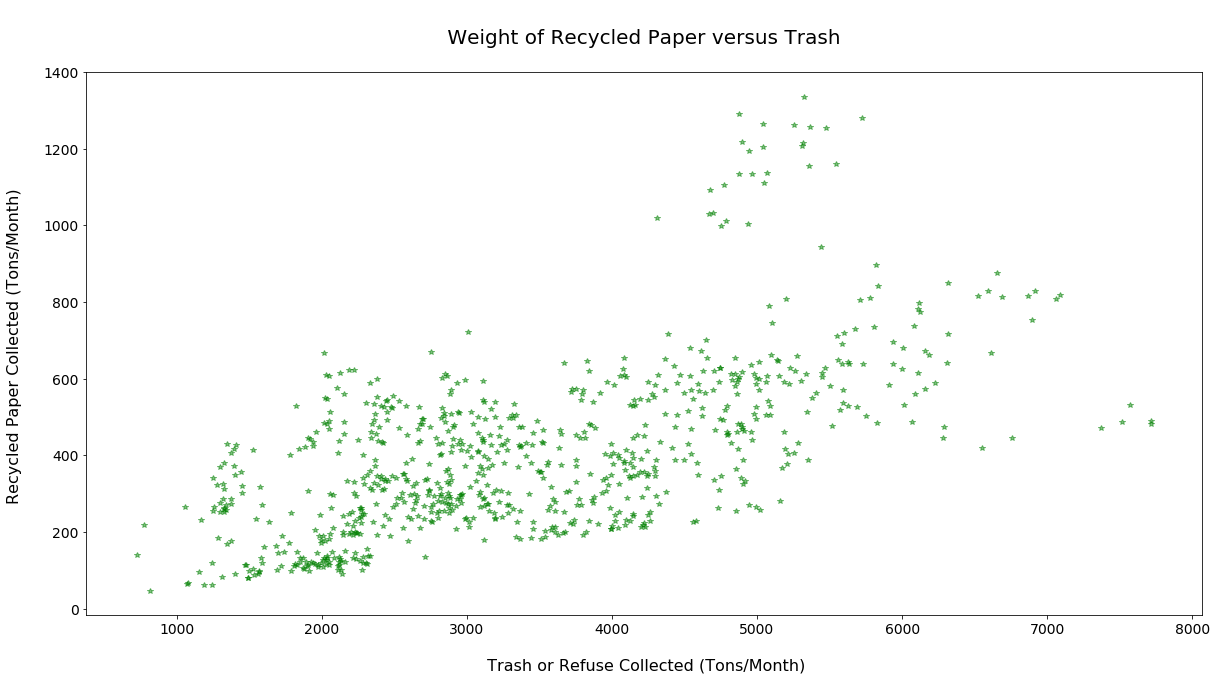

In [16]:
X=TonnageR['REFUSETONSCOLLECTED']
Y=TonnageR['PAPERTONSCOLLECTED']
plt.plot(X, Y, '*', c='g', alpha=0.5)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.locator_params(axis='X', numticks=15)https://data.cityofnewyork.us/api/views/ebb7-mvp5/rows.csv?accessType=DOWNLOAD
#plt.locator_params(axis="Y", numticks=15)
plt.xlabel("\n Trash or Refuse Collected (Tons/Month)", fontsize=16, position=(0.5,1))
plt.ylabel("Recycled Paper Collected (Tons/Month) \n", fontsize=16, position=(-0.5,0.5))
plt.title("\n Weight of Recycled Paper versus Trash \n ", fontsize=20)
plt.rcParams["figure.figsize"] = [20,10]
plt.show()

### Figure 1: The plot shows data collected by DSNY reporting New York City residential tonnage. 
The weight of Recycled Paper versus Trash Collected from each NYC community (Monthly data from 2017 August to Present) are presented. The plot shows a relatively positive correlation between the weight of recycled paper and trash.  


# Homework 2 - Extra Credit
### 1. Work with and APIs and dates in Pandas

Working with extracting data from JSON file. 

In [17]:
tonlink="https://data.cityofnewyork.us/resource/8bkb-pvci.json"
Tonjson=pd.read_json(tonlink)

Display the top 8 rows.

In [18]:
Tonjson.head(8)

,borough,borough_id,communitydistrict,leavesorganictons,mgptonscollected,month,papertonscollected,refusetonscollected,resorganicstons,schoolorganictons,xmastreetons
0,Queens,4,4,5.07,394.00,2017 / 11,349.78,3997.15,NaN,NaN,NaN
1,Queens,4,11,NaN,396.53,2017 / 10,483.03,2691.88,236.41,NaN,NaN
2,Queens,4,7,NaN,694.62,2017 / 08,808.68,7058.92,NaN,NaN,NaN
3,Bronx,2,1,NaN,131.22,2017 / 09,105.14,1870.63,NaN,NaN,NaN
4,Queens,4,6,NaN,367.11,2018 / 08,438.97,2951.58,NaN,NaN,NaN
5,Brooklyn,3,9,NaN,214.42,2018 / 07,235.52,2996.15,NaN,NaN,NaN
6,Manhattan,1,12,NaN,499.46,2017 / 12,494.35,4748.06,NaN,39.07,NaN
7,Staten Island,5,3,NaN,757.62,2018 / 08,796.56,6118.22,NaN,NaN,NaN


### 2. Ploting Month&Year vs volume data of Recycled Paper collected from each community on a monthly basis.  

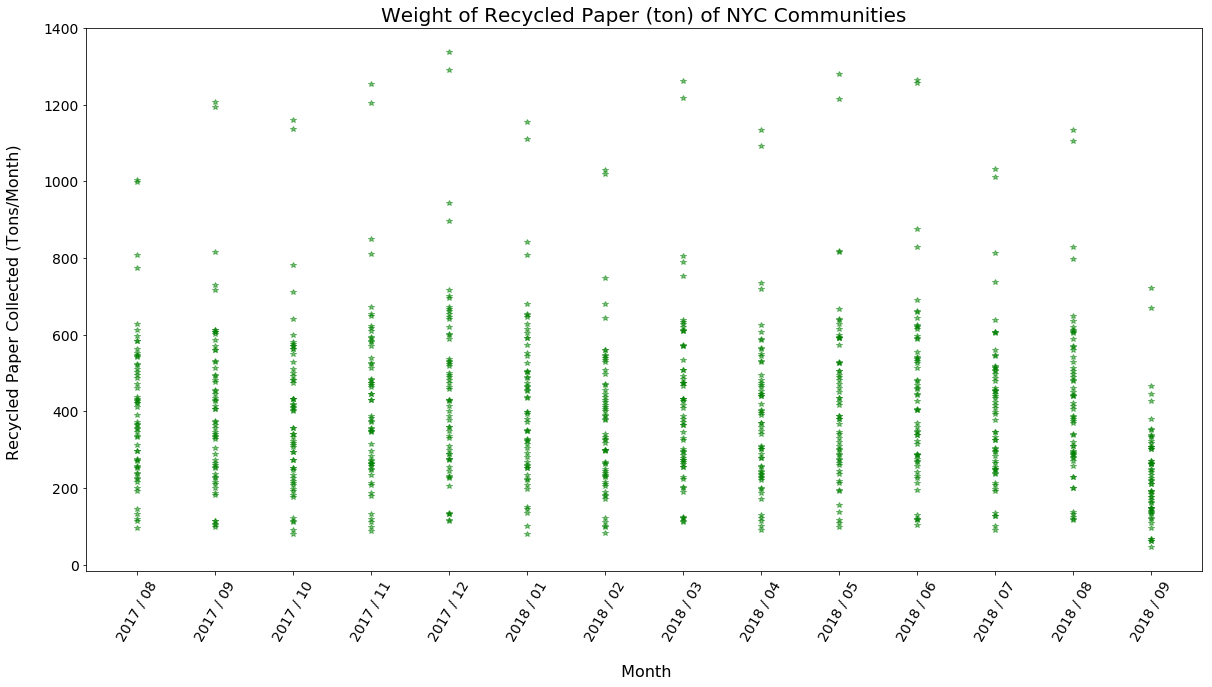

In [19]:
X1=Tonnage['MONTH']
Y1=Tonnage['PAPERTONSCOLLECTED']
plt.plot(X1, Y1, '*', c='g', alpha=0.5)
plt.xticks(fontsize=14, rotation=60)
plt.yticks(fontsize=14)
#plt.locator_params(axis='X', numticks=15)https://data.cityofnewyork.us/api/views/ebb7-mvp5/rows.csv?accessType=DOWNLOAD
#plt.locator_params(axis="Y", numticks=15)
plt.xlabel("\n Month", fontsize=16, position=(0.5,10))
plt.ylabel("Recycled Paper Collected (Tons/Month) \n", fontsize=16, position=(-0.5,0.5))
plt.title("Weight of Recycled Paper (ton) of NYC Communities", fontsize=20)
plt.rcParams["figure.figsize"] = [15,10]

plt.show()

### Figure 2: DSNY-New York City Residential Tonnage: Weight of Recycled Paper (ton) of NYC Communities (Monthly data from 2017 August to Present)

### This does not show a clear trend and therefore, I will process the data and use statistical value to present. 

The data right now in the csv table is on each month, how many tons of paper has one community been collected. I am going to first find out how many month of data has been collected. Then, the average paper that has been collected from all the NYC communities. 

Links I referred to for unique value and sum commands:
https://stackoverflow.com/questions/51330281/sum-values-of-column-based-on-the-unique-values-of-another-column

https://chrisalbon.com/python/data_wrangling/pandas_dataframe_count_values/

Panda Series plotting: 
https://stackoverflow.com/questions/37514686/how-to-plot-a-bar-graph-from-a-pandas-series


In [20]:
#Obtain all the unique value of Month. 
m=Tonnage['MONTH'].unique()
m

array(['2017 / 08', '2017 / 09', '2017 / 10', '2017 / 11', '2017 / 12',
       '2018 / 01', '2018 / 02', '2018 / 03', '2018 / 04', '2018 / 05',
       '2018 / 06', '2018 / 07', '2018 / 08', '2018 / 09'], dtype=object)

In [21]:
g=Tonnage.groupby('MONTH')['PAPERTONSCOLLECTED'].mean()
print(g)
print("type:", type(g))

MONTH
2017 / 08    409.169492
2017 / 09    417.849153
2017 / 10    397.832203
2017 / 11    430.571186
2017 / 12    467.211864
2018 / 01    433.738983
2018 / 02    375.977966
2018 / 03    430.579661
2018 / 04    394.844068
2018 / 05    435.986441
2018 / 06    447.759322
2018 / 07    404.444068
2018 / 08    433.150847
2018 / 09    239.569492
Name: PAPERTONSCOLLECTED, dtype: float64
type: <class 'pandas.core.series.Series'>


In [22]:
#September is still on-going, therefore, to be accurate, I am dropping the data of 2018/09
#Link for drop function: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.drop.html

gn=g.drop(labels=['2018 / 09'])
print (gn)

MONTH
2017 / 08    409.169492
2017 / 09    417.849153
2017 / 10    397.832203
2017 / 11    430.571186
2017 / 12    467.211864
2018 / 01    433.738983
2018 / 02    375.977966
2018 / 03    430.579661
2018 / 04    394.844068
2018 / 05    435.986441
2018 / 06    447.759322
2018 / 07    404.444068
2018 / 08    433.150847
Name: PAPERTONSCOLLECTED, dtype: float64


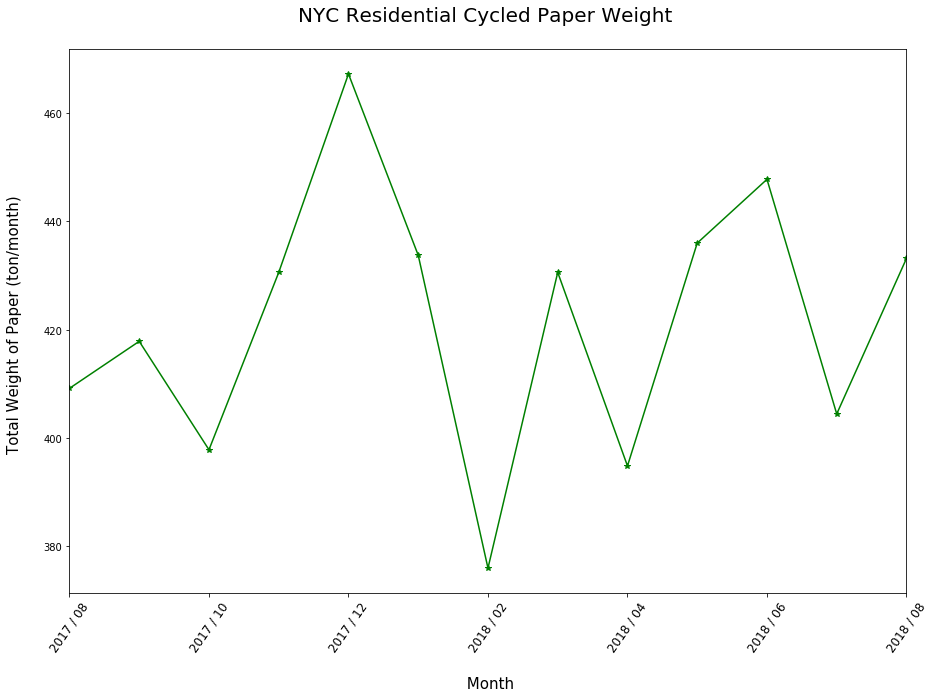

In [23]:
gn.plot.line(color='g', marker='*')
plt.ylabel("Total Weight of Paper (ton/month) \n", fontsize=15)
plt.xlabel("\n Month", fontsize=15)
plt.xticks(rotation=55, fontsize=12)
plt.title("NYC Residential Cycled Paper Weight \n", fontsize=20)
plt.rcParams["figure.figsize"]=[15,10]
plt.show()

### Figure 2: The plot shows data collected by DSNY reporting New York City residential tonnage. The sum weight of Recycled Paper (unit: ton) collected from all NYC communities on a monthly basis (from 2017 August to Present) is plotted against the month. 
We can see that the total weight of paper collected fluctuates throughout a year with no very obvious trend of seasons. A larger dataset can be used to study the weight of cycled paper through different seasons/time of a year. I was anticipating a peak in January as Christmas gift wraps are being recyled but noticed a peak in December. 

### To practice with another dataset. I am ploting date vs morning turbidity of watershed. 

In [24]:
water="https://data.cityofnewyork.us/api/views/y43c-5n92/rows.csv?accessType=DOWNLOAD"
Waterd=pd.read_csv(water)

Display the top 7 rows. 

In [25]:
Waterd.head(7)

,Site,Date,Turbidity(NTU) at 12AM,Turbidity(NTU) at 4AM,Turbidity(NTU) at 8AM,Turbidity(NTU) at 12PM,Turbidity(NTU) at 4PM,Turbidity(NTU) at 8PM,Average 24hrTurbidity(NTU),"Coliform, Fecal(fc/100mL)"
0,DEL18DT,05/10/2015,NaN,1.0,0.95,0.95,1.00,1.00,0.98,<1
1,DEL18DT,05/11/2015,1.0,1.1,0.95,1.00,1.10,1.10,1.04,<1
2,DEL18DT,05/12/2015,1.1,1.1,1.10,0.90,0.95,1.10,1.04,1
3,DEL18DT,05/13/2015,0.9,1.1,0.95,0.90,1.00,0.95,0.97,1
4,DEL18DT,05/14/2015,1.1,1.0,1.00,0.95,0.95,0.95,0.99,<1
5,DEL18DT,05/15/2015,1.0,1.0,1.00,0.90,0.95,1.00,0.98,<1
6,DEL18DT,05/16/2015,1.1,1.0,1.00,0.75,0.85,0.95,0.94,<1


Display all the columns. 

In [26]:
Waterd.columns

Index(['Site', 'Date', 'Turbidity(NTU) at 12AM', 'Turbidity(NTU) at 4AM',
       'Turbidity(NTU) at 8AM', 'Turbidity(NTU) at 12PM',
       'Turbidity(NTU) at 4PM', 'Turbidity(NTU) at 8PM',
       'Average 24hrTurbidity(NTU)', 'Coliform, Fecal(fc/100mL)'],
      dtype='object')

Select only 2 columns. 

In [27]:
Waterd_2c=Waterd[['Date','Turbidity(NTU) at 8AM']]

In [28]:
Waterd_2c.head()

,Date,Turbidity(NTU) at 8AM
0,05/10/2015,0.95
1,05/11/2015,0.95
2,05/12/2015,1.10
3,05/13/2015,0.95
4,05/14/2015,1.00


Plotting morning turbidity at selected sites against dates. Doing the same procedures as before, I'm getting a mean of turbidity across all the selected sites. 

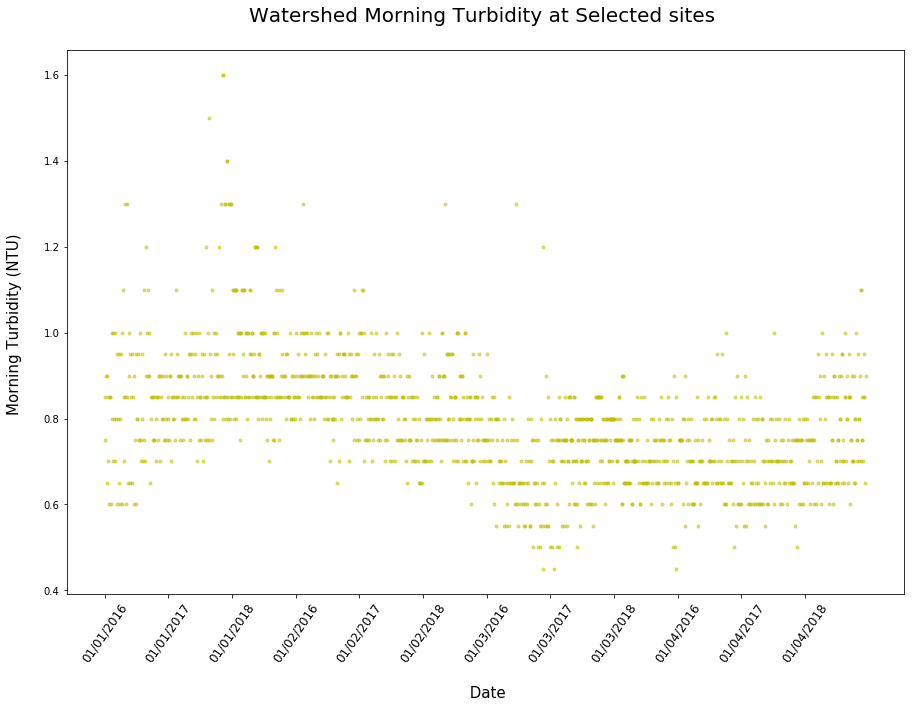

In [29]:
X2=Waterd['Date']
Y2=Waterd['Turbidity(NTU) at 8AM']
plt.plot(X2, Y2,"y.", alpha=0.5)
plt.xticks(rotation=55, fontsize=12)
plt.locator_params(nbins=12)
plt.xlabel("\n Date", fontsize=15)
plt.ylabel("Morning Turbidity (NTU) \n", fontsize=15)
plt.title("Watershed Morning Turbidity at Selected sites \n", fontsize=20)
plt.rcParams["figure.figsize"]=[20,15]
plt.show()


   ### Figure 3: Daily Morning Water Turbidity Collected at Selected Watersheds
   This figure shows the Water Turbidity (NTU) value collected from selected NYC watersheds at 8AM on a daily basis. The morning water turbidity is plotted against the data of collection. We can see a trend of daily turdibity at selected watersheds. From early 2016, turbidity are mostly ranging from 0.6 to 1.0 whereas in 2017 and 2018, turbidity ranges mostly from 0.5 to 0.8. The decreasing trend of NTU demonstrates better water quality. 
   
   ### The plot can be improved to make a clearer trend through obtaining the mean of daily measurements and plotting against the dates. 


### The plot above is hard to see the result and therefore, I am doing the same procedure as the tonnage data. 

In [30]:
date=Waterd['Date'].unique()
print(date)

['05/10/2015' '05/11/2015' '05/12/2015' ..., '08/29/2018' '08/30/2018'
 '08/31/2018']


In [31]:
tur=Waterd.groupby('Date')['Turbidity(NTU) at 8AM'].mean()
print(tur)
print("type:", type(tur))

Date
01/01/2016    0.85
01/01/2017    0.75
01/01/2018    0.90
01/02/2016    0.90
01/02/2017    0.65
01/02/2018    0.85
01/03/2016    0.70
01/03/2017    0.60
01/03/2018    0.85
01/04/2016    0.85
01/04/2017    0.60
01/04/2018    1.00
01/05/2016    0.80
01/05/2017    0.70
01/05/2018    1.00
01/06/2016    0.80
01/06/2017    0.70
01/06/2018    1.00
01/07/2016    0.80
01/07/2017    0.60
01/07/2018    0.95
01/08/2016    0.80
01/08/2017    0.65
01/08/2018    0.95
01/09/2016    0.80
01/09/2017    0.60
01/09/2018    0.95
01/10/2016    1.00
01/10/2017    0.60
01/10/2018    1.10
              ... 
12/22/2015    0.80
12/22/2016    0.65
12/22/2017    0.95
12/23/2015    0.85
12/23/2016    0.60
12/23/2017    0.85
12/24/2015    0.75
12/24/2016    0.70
12/24/2017    0.90
12/25/2015    0.70
12/25/2016    0.65
12/25/2017    0.90
12/26/2015    0.80
12/26/2016    0.65
12/26/2017    1.00
12/27/2015    0.75
12/27/2016    0.70
12/27/2017    0.95
12/28/2015    0.80
12/28/2016    0.70
12/28/2017    0.90
12/29/2

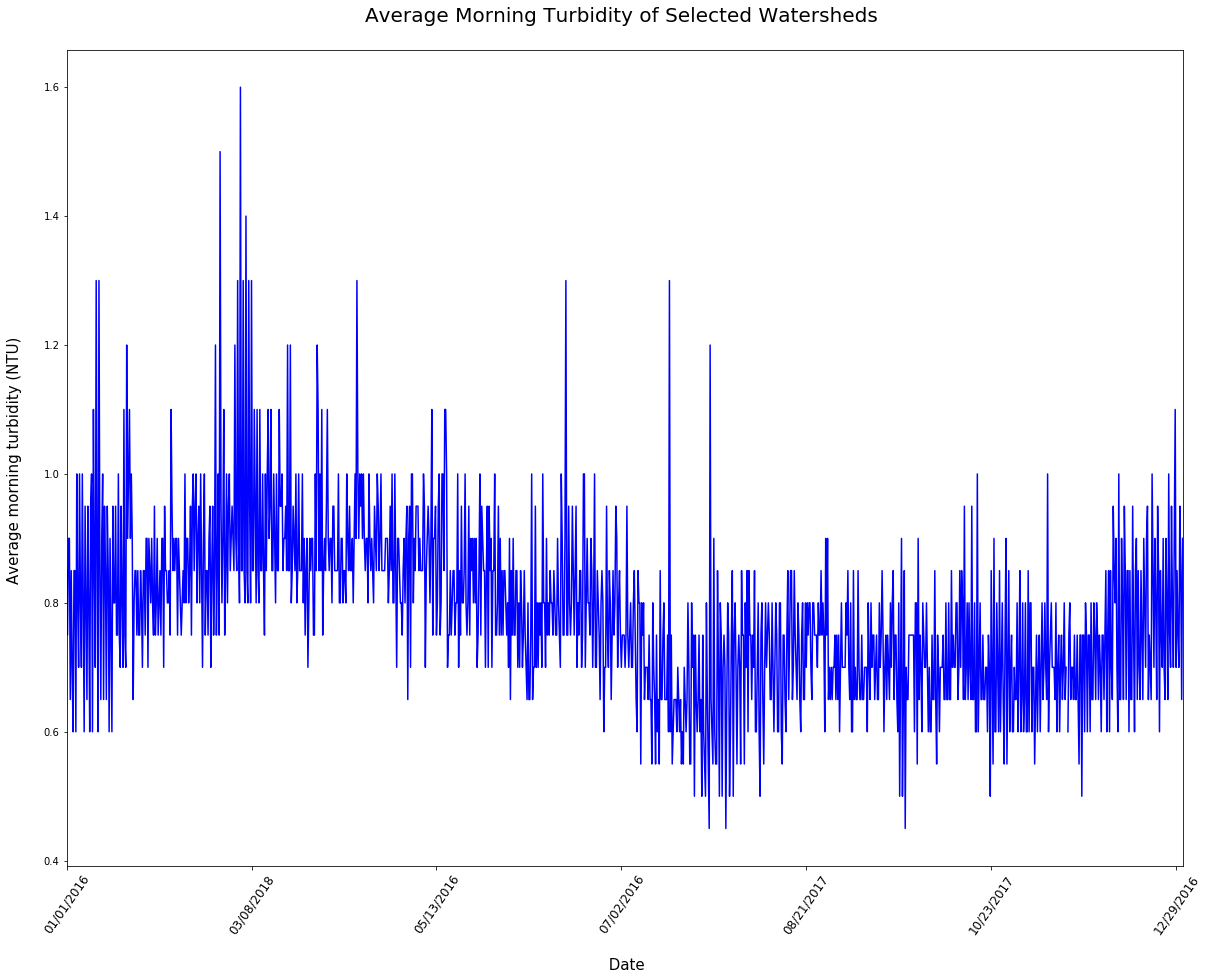

In [32]:
tur.plot.line(color='b')
plt.ylabel("Average morning turbidity (NTU) \n", fontsize=15)
plt.xlabel("\n Date", fontsize=15)
plt.xticks(rotation=55, fontsize=12)
plt.title("Average Morning Turbidity of Selected Watersheds \n", fontsize=20)
#plt.plot("b.", alpha=0.5)
plt.rcParams["figure.figsize"]=[15,10]
plt.show()

### Figure 5: Average Water Turbidity of Selected Watersheds.
The trend in this figure is more clearer as we can see an overall relatively decreassing trend of water turbidity value which indicates the water quality has been improved. 